In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import time


Bad key "text.kerning_factor" on line 4 in
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
nc_file = r"E:\hgt.2012.nc"
fh = Dataset(nc_file, mode='r')

In [4]:
lons = fh.variables['lon'][:].data
lats = fh.variables['lat'][:].data
times = fh.variables['time'][:].data
times = times - times[0]
hgt = fh.variables['hgt'][:].data

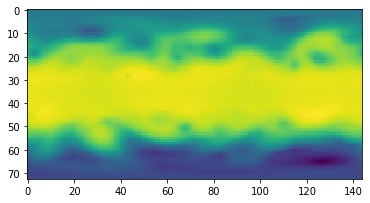

In [5]:
p_hgts = hgt[301,3]
plt.imshow(p_hgts)

### 240 -340 Longitude
### 20 - 80 Latitude

In [6]:
def get_hgt(day,level,US_focus=True):
    new_hgt = hgt[day-1,level-1]
    std_hgts = (new_hgt - new_hgt.min())/(new_hgt.max()-new_hgt.min())
    if US_focus:
        return std_hgts[:60,80:]
    else:
        return std_hgts

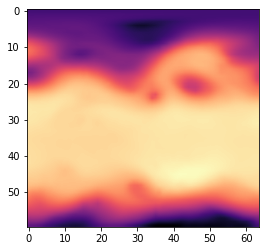

In [7]:
p_hgts = p_hgts[:60,80:]
p_hgts = (p_hgts - p_hgts.min())/(p_hgts.max()-p_hgts.min())
plt.imshow(p_hgts,interpolation='bilinear', cmap='magma')

In [8]:
from skimage import measure

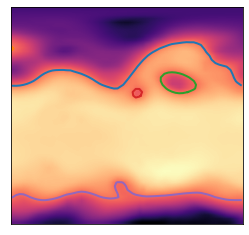

In [9]:
contours = measure.find_contours(p_hgts, 0.7)
fig, ax = plt.subplots()
ax.imshow(p_hgts,interpolation='bilinear', cmap='magma')

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### To get basemap to work
```
conda activate base
```

In [10]:
import cartopy.crs as ccrs

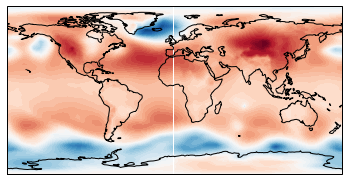

In [11]:
hgs = get_hgt(1,1,US_focus=False)
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, hgs, 60,
             transform=ccrs.PlateCarree(),cmap='RdBu_r')

ax.coastlines()

plt.show()

In [12]:
lat_mask = ((lats>=20) & (lats<=60)) # Originally 20 -60
trunc_lats = lats[lat_mask]

lon_mask = ((lons>=220) & (lons<=340)) # Originally 240 -340
trunc_lons = lons[lon_mask]

start_lat = np.argwhere(lat_mask).min()
end_lat = np.argwhere(lat_mask).max()

start_lon = np.argwhere(lon_mask).min()
end_lon = np.argwhere(lon_mask).max()

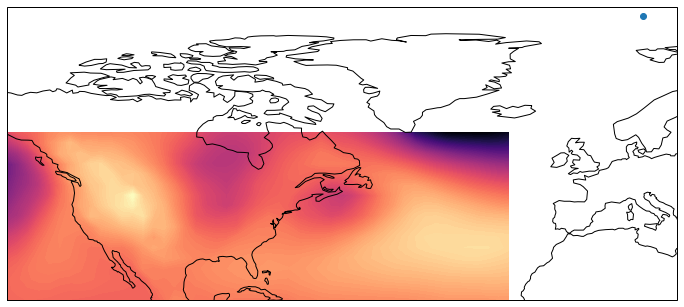

In [138]:
plt.figure(figsize=(12,7))
trunc_hgs = hgs[start_lat:end_lat+1,start_lon:end_lon+1]
trunc_hgs = (trunc_hgs - trunc_hgs.min())/(trunc_hgs.max()-trunc_hgs.min())
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(trunc_lons, trunc_lats, trunc_hgs, 100,
             transform=ccrs.PlateCarree(),cmap='magma', linestyles='dashed')

for n, contour in enumerate(contours):
    contour = transform_contour(contour)
#     ax.plot(-contour[:, 1], contour[:, 0], linewidth=2, transform=ccrs.PlateCarree())


ax.coastlines()
plt.show()

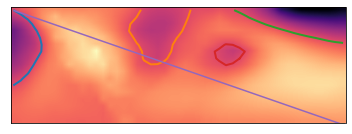

In [125]:
contours = measure.find_contours(trunc_hgs, 0.6)
fig, ax = plt.subplots()
ax.imshow(trunc_hgs,interpolation='bilinear', cmap='magma')

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
plt.plot(fake_contour[:,1],fake_contour[:,0])
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [88]:
print(start_lat)
print(end_lat)
print(start_lon)
print(end_lon)

12
28
88
136


In [104]:
def transform_contour(contour):
    cnt = contour.copy()
    cnt[:,0] = contour[:,0]*(end_lat-start_lat)/trunc_hgs.shape[0] + start_lat
    cnt[:,1] = contour[:,1]*(end_lon-start_lon)/trunc_hgs.shape[1] + start_lon
    return cnt

In [100]:
trunc_hgs.shape

(17, 49)

In [123]:
x = np.linspace(0,49,10)
y = ((17-1)/(49-1))*x
fake_contour = np.array([[0,0],
                         [17,49]])
fake_contour

array([[ 0,  0],
       [17, 49]])

In [126]:
trans_contour = transform_contour(fake_contour)
trans_contour

array([[ 12,  88],
       [ 28, 136]])

In [107]:
contours[0]

array([[10.87230615,  0.        ],
       [10.2163966 ,  1.        ],
       [10.        ,  1.19196282],
       [ 9.2443284 ,  2.        ],
       [ 9.        ,  2.17908431],
       [ 8.        ,  2.82510245],
       [ 7.68311769,  3.        ],
       [ 7.        ,  3.39730278],
       [ 6.        ,  3.9784533 ],
       [ 5.6193871 ,  4.        ],
       [ 5.        ,  4.02622751],
       [ 4.89186893,  4.        ],
       [ 4.        ,  3.79311647],
       [ 3.        ,  3.32301157],
       [ 2.54435141,  3.        ],
       [ 2.        ,  2.6467177 ],
       [ 1.29834622,  2.        ],
       [ 1.        ,  1.56158518],
       [ 0.57402177,  1.        ],
       [ 0.        ,  0.01670681]])